In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, data


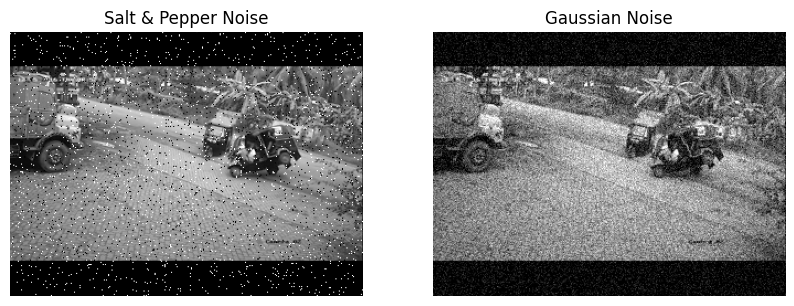

In [4]:
# Contoh citra CCTV (gunakan dari file, upload manual, atau pakai dari skimage)
# Ganti ini jika kamu punya gambar sendiri
image = cv2.imread("/kaggle/input/road-accidents-from-cctv-footages-dataset/Accident/Accident/1.jpg", cv2.IMREAD_GRAYSCALE)


# Tambah noise
noisy_sp = util.random_noise(image, mode='s&p')
noisy_gaussian = util.random_noise(image, mode='gaussian')

# Konversi kembali ke uint8
noisy_sp_uint8 = (noisy_sp * 255).astype(np.uint8)
noisy_gaussian_uint8 = (noisy_gaussian * 255).astype(np.uint8)

# Tampilkan
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_sp_uint8, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(noisy_gaussian_uint8, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')
plt.show()


In [5]:
mean_filtered = cv2.blur(noisy_sp_uint8, (3, 3))

In [6]:
median_filtered = cv2.medianBlur(noisy_sp_uint8, 3)

In [7]:
gaussian_filtered = cv2.GaussianBlur(noisy_gaussian_uint8, (3,3), 0)

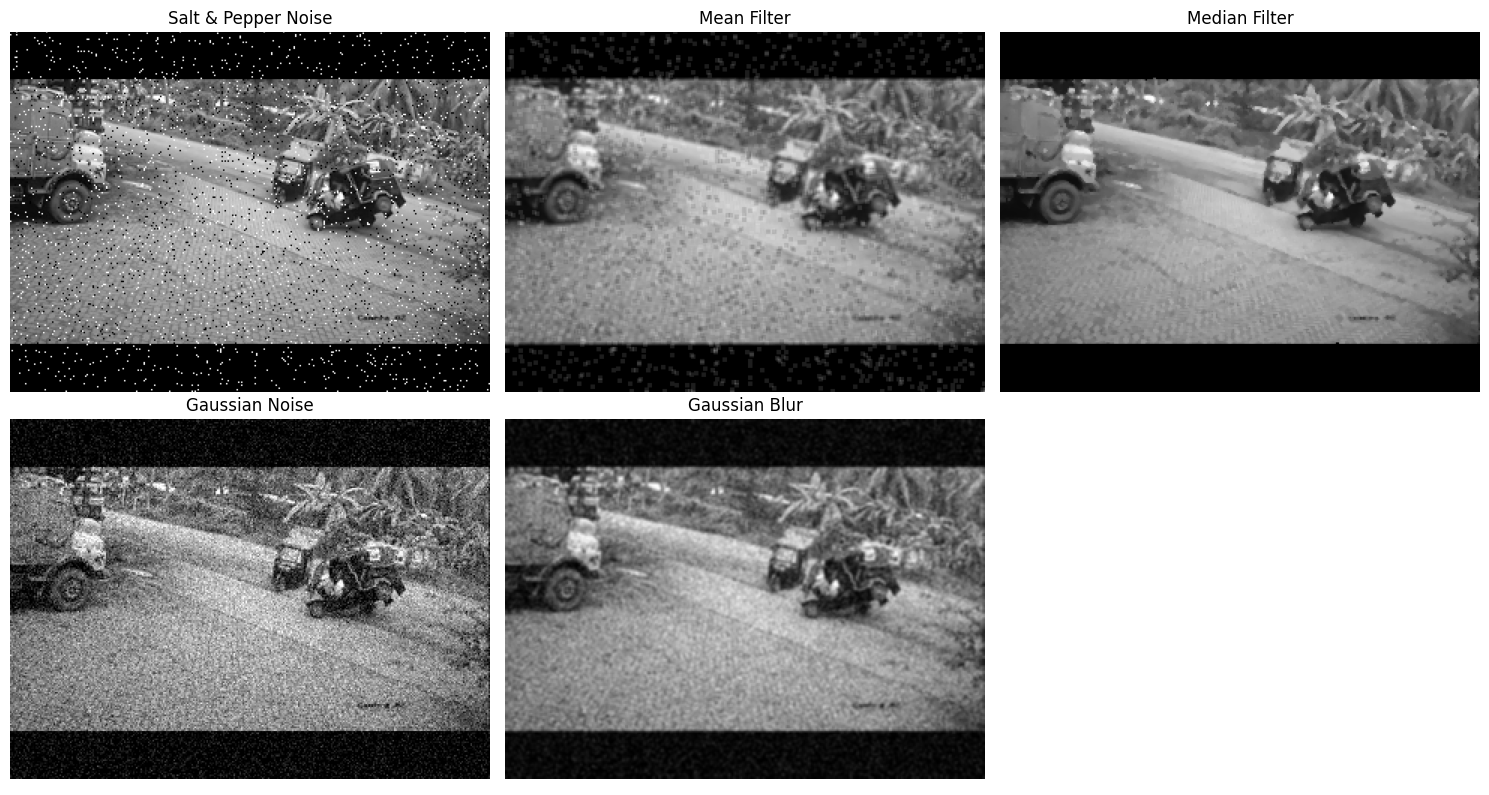

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].imshow(noisy_sp_uint8, cmap='gray')
axs[0, 0].set_title("Salt & Pepper Noise")
axs[0, 1].imshow(mean_filtered, cmap='gray')
axs[0, 1].set_title("Mean Filter")
axs[0, 2].imshow(median_filtered, cmap='gray')
axs[0, 2].set_title("Median Filter")

axs[1, 0].imshow(noisy_gaussian_uint8, cmap='gray')
axs[1, 0].set_title("Gaussian Noise")
axs[1, 1].imshow(gaussian_filtered, cmap='gray')
axs[1, 1].set_title("Gaussian Blur")
axs[1, 2].axis('off')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
